# Purpose

I'm an analyst for a site that receives car sales advertisements
- determine what factors are related to the price of the vehicle?


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasoline, diesel etc.
- `odometer` — distance driven (kilometers)
- `transmission`
- `type`
- `paint_color`
- `is_4wd` — if the vehicle is 4 wheel drive
- `date_posted` 
- `days_listed` — time between post and sell

<p>(Data until 2019)</p>

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../datasets/vehicles_us.csv')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Checking Duplicates

In [3]:
df.duplicated().sum()

0

### Checking Missing Values

In [4]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
(df.isna().sum()).sum()

51991

### Checking DataTypes for each column

In [6]:
for col in df.columns:
    print(col.upper())
    print(df[col].dtype)
    print()

PRICE
int64

MODEL_YEAR
float64

MODEL
object

CONDITION
object

CYLINDERS
float64

FUEL
object

ODOMETER
float64

TRANSMISSION
object

TYPE
object

PAINT_COLOR
object

IS_4WD
float64

DATE_POSTED
object

DAYS_LISTED
int64



`missing values`:
- there seem to be too many, which makes the idea of ​​deleting them unfeasible. In this case it is worth checking one by one to verify a possible cause for the absences and also to find a suitable way to fill them in (so as not to distort the data)

`data typing`:
- there are some incorrect types to be fixed
- there is opportunity to modify in order to facilitate analysis (as in condition, which can be scaled by making categorical values ​​quantitative)

### Checking columns separatedly and fixing:

In [7]:
df['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [8]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

- transforming `condition` into a score according to the **condition** of preservation of the vehicle

In [9]:
df['condition'] = df['condition'].replace(
    {
        'new': '5',
        'like new': '4',
        'excellent': '3',
        'good': '2',
        'fair': '1',
        'salvage': '0'        
    }
)

In [10]:
df['condition'] = df['condition'].astype('int')
df['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [11]:
df['cylinders'].isna().sum()

5260

- amount of missing too relevant to be deleted, I choose to fill in
- filling in the missing values ​​of `cylinders` based on the mode of the number of cylinders of columns with the same value in `type`:

In [12]:
df['cylinders'] = df.groupby('type')['cylinders'].apply(lambda x: x.fillna(x.mode()[0]))

print(df)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5          2        6.0  gas  145000.0   
1      25500         NaN      ford f-150          2        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata          4        4.0  gas  110000.0   
3       1500      2003.0      ford f-150          1        8.0  gas       NaN   
4      14900      2017.0    chrysler 200          3        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima          4        6.0  gas   88136.0   
51521   2700      2002.0     honda civic          0        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata          3        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla          2        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima          2        4.0  gas       NaN   

      transmission    type 

In [13]:
df['cylinders'].isna().sum()

0

In [14]:
df['cylinders'].value_counts()

8.0     18081
6.0     17169
4.0     15414
10.0      553
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [15]:
df['cylinders'] = df['cylinders'].where(df['cylinders'] != 2018,
                                        df.groupby('type')['cylinders'].apply(lambda x: x.mode()[0]))

In [16]:
df['odometer'].isna().sum()

7892

- amount of missing too relevant to be deleted, I choose to fill in
- filling in the missing `odometer` values ​​based on average km driven by vehicles that are in the same `condition` rank as the one I want to fill in:

In [17]:
df['odometer'] = df.groupby('condition')['odometer'].apply(lambda x: x.fillna(x.mode()[0]))

In [18]:
df['odometer'].isna().sum()

0

In [19]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [20]:
df['odometer'].dtype

dtype('float64')

In [21]:
# df['odometer'] = df['odometer'].astype('int')

In [22]:
df[df['odometer'] == 0]['condition'].value_counts()

2    3196
3      69
1       6
4       4
0       2
Name: condition, dtype: int64

- how does a reset odometer not symbolize a condition equal to 5 (new) ???

In [23]:
df = df.drop(df[df['odometer'] == 0].index)

In [24]:
df['is_4wd'].dtype

dtype('float64')

In [25]:
df['is_4wd'].value_counts()

1.0    24020
Name: is_4wd, dtype: int64

In [26]:
df['is_4wd'].isna().sum()

24228

- I deduced that the missing values ​​in `is_4wd` are actually 0 (False)

In [27]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [28]:
df['is_4wd'].value_counts()

0.0    24228
1.0    24020
Name: is_4wd, dtype: int64

In [29]:
df['is_4wd'] = df['is_4wd'].astype('bool') #.replace({1: True, 0: False})

In [30]:
df['is_4wd'].value_counts()

False    24228
True     24020
Name: is_4wd, dtype: int64

- filling gaps in `paint_color` :

In [31]:
df['paint_color'].value_counts()

white     9398
black     7191
silver    5904
grey      4714
blue      4190
red       4150
green     1282
brown     1147
custom    1052
yellow     237
orange     223
purple      95
Name: paint_color, dtype: int64

In [32]:
df['paint_color'] = df['paint_color'].fillna('unknown')

In [33]:
df['paint_color'].isna().sum()

0

In [34]:
df['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

- checking type and absences in columns related to dates and time:

In [35]:
lista = ['date_posted', 'days_listed', 'model_year']
for c in lista:
    print(df[c].dtype)
    print(df[c].isna().sum())

object
0
int64
0
float64
3362


In [36]:
df['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [37]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [38]:
df['date_posted'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

In [39]:
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,6
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2
3,1500,2003.0,ford f-150,1,8.0,gas,200000.0,automatic,pickup,unknown,False,2019-03-22,9,2019,3
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4


In [40]:
for c in lista:
    print(df[c].dtype)
    print(df[c].isna().sum())

datetime64[ns]
0
int64
0
float64
3362


In [41]:
df['days_listed'].describe()

count    48248.000000
mean        39.539214
std         28.159874
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [42]:
print("{:.2f} %".format((df['model_year'].isna().sum() * 100 / len(df))))
print("{:.2f} %".format((df['model_year'] == 0).sum() * 100 / len(df)))

6.97 %
0.00 %


In [43]:
df['model_year'].min()

1908.0

In [44]:
df['model_year'] = df['model_year'].fillna(0).astype('int')

In [45]:
for item in df.columns:
    print('-------'*10)
    print(item.upper())
    print(df[df['model_year'] == 0][item].value_counts().sort_values())

----------------------------------------------------------------------
PRICE
3150      1
38500     1
8994      1
33995     1
12998     1
         ..
7995     38
3500     41
5500     44
6500     52
1        52
Name: price, Length: 914, dtype: int64
----------------------------------------------------------------------
MODEL_YEAR
0    3362
Name: model_year, dtype: int64
----------------------------------------------------------------------
MODEL
mercedes-benz benze sprinter 2500      7
honda civic lx                        11
acura tl                              11
buick enclave                         12
chevrolet silverado 3500hd            12
                                    ... 
honda accord                          75
chevrolet silverado                   92
ram 1500                             113
chevrolet silverado 1500             148
ford f-150                           182
Name: model, Length: 100, dtype: int64
--------------------------------------------------------------

In [46]:
df[df['model_year'] == 0]['year_posted'].value_counts()

2018    2319
2019    1043
Name: year_posted, dtype: int64

In [47]:
df['model_year'].max()

2019

- I deduced that missing values in `model_year` are vehicles from 2018/2019 (present time when the data was collected), maybe advertisers left it blank instead of putting 0

In [48]:
# df[df['model_year'] == 0] = 2018 ERRADO
df.loc[df['model_year'] == 0, 'model_year'] = 2018

In [49]:
df['model_year'].min()

1908

In [50]:
for c in lista:
    print(df[c].dtype)
    print(df[c].isna().sum())

datetime64[ns]
0
int64
0
int32
0


In [51]:
df['vehicle_age'] = df['year_posted'] - df['model_year']
print(df['vehicle_age'].min())
print(df['vehicle_age'].max())

0
110


In [52]:
df['km_per_year'] = df['odometer'] / (df['vehicle_age'] + 1)

- filter df for a table without outliers (filtered)

In [53]:
check_cols = ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']

In [54]:
for col in check_cols:
    print(col.upper())
    print(df[col].describe())
    print('----------------------------')
    
print(df['vehicle_age'].quantile(0.90))    

PRICE
count     48248.000000
mean      12229.253793
std       10100.238127
min           1.000000
25%        5000.000000
50%        9400.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64
----------------------------
VEHICLE_AGE
count    48248.000000
mean         7.898006
std          6.377105
min          0.000000
25%          3.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
----------------------------
ODOMETER
count     48248.000000
mean     116315.128544
std       61906.722122
min           1.000000
25%       76030.750000
50%      119783.500000
75%      151000.000000
max      990000.000000
Name: odometer, dtype: float64
----------------------------
CYLINDERS
count    48248.000000
mean         6.136047
std          1.665656
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
----------------------------
CO

In [55]:
# print(df.columns)
filtered = pd.DataFrame(data=df, columns=['price', 'model', 'condition', 'fuel', 'cylinders', 'paint_color', 'odometer', 'transmission', 'type', 'is_4wd', 'days_listed', 'vehicle_age', 'km_per_year'])

#for col in ['price', 'model_year', 'condition', 'cylinders', 'odometer', 'days_listed', 'vehicle_age', 'km_per_year']:
for col in ['price', 'vehicle_age', 'odometer']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
        
        
    limite_inferior = Q1 -1.5 * IQR
    limite_superior = Q3 +1.5 * IQR
    
    if col == 'price':
        limite_inferior = 0
        
    if col == 'vehicle_age':
        limite_inferior = 0
        # print(df['vehicle_age'].quantile(0.90))    
        limite_superior = 20

    if col == 'odometer':
        limite_inferior = 0
        limite_superior = 300000
        
        
    filtered = filtered.loc[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

filtered = filtered.reset_index()
filtered['price'] = filtered['price'].astype('int')
print(filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44950 entries, 0 to 44949
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         44950 non-null  int64  
 1   price         44950 non-null  int32  
 2   model         44950 non-null  object 
 3   condition     44950 non-null  int32  
 4   fuel          44950 non-null  object 
 5   cylinders     44950 non-null  float64
 6   paint_color   44950 non-null  object 
 7   odometer      44950 non-null  float64
 8   transmission  44950 non-null  object 
 9   type          44950 non-null  object 
 10  is_4wd        44950 non-null  bool   
 11  days_listed   44950 non-null  int64  
 12  vehicle_age   44950 non-null  int64  
 13  km_per_year   44950 non-null  float64
dtypes: bool(1), float64(3), int32(2), int64(3), object(5)
memory usage: 4.2+ MB
None


- compare the histograms of the dataframe with outliers and the one without outliers (with respect to the values ​​given as hypothetically relevant to the vehicle price (check_cols))

In [56]:
print(filtered['price'].min())
print(filtered['price'].max())

print(df['price'].min())
print(df['price'].max())

1
34700
1
375000


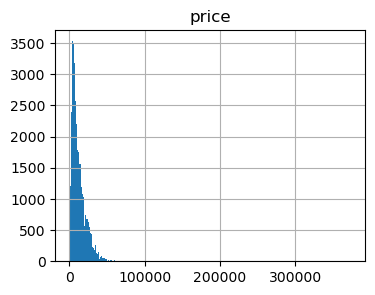

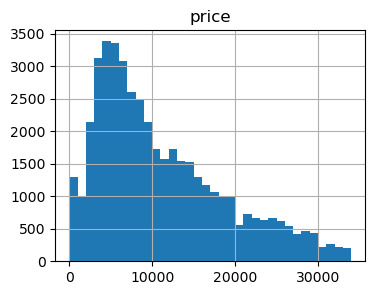

In [57]:
df.hist(column=['price'], figsize=(4, 3), range=(0, 375000), bins=range(0, df['price'].max(), 1000))
plt.show()

filtered.hist(column=['price'], figsize=(4, 3), range=(0, 35000), bins=range(0, filtered['price'].max(), 1000))
plt.show()

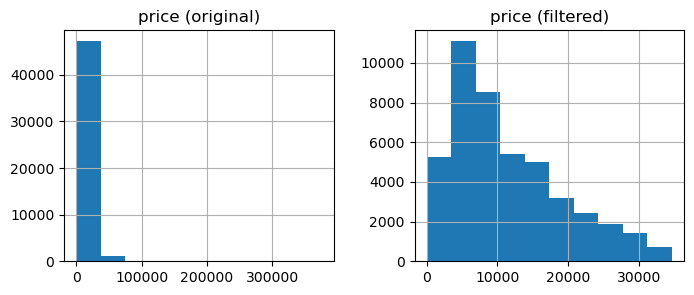

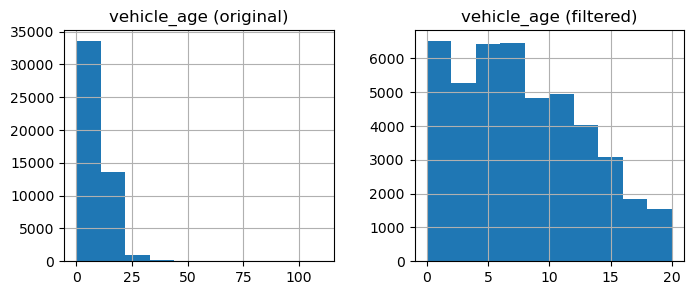

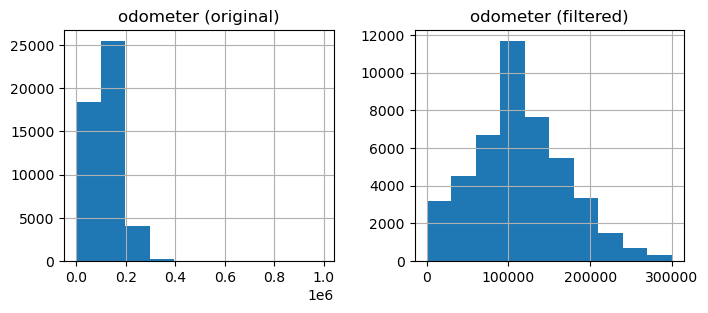

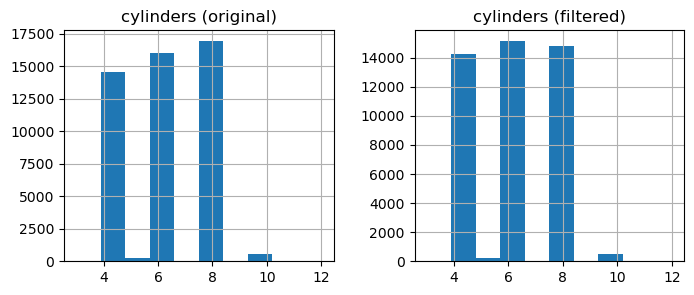

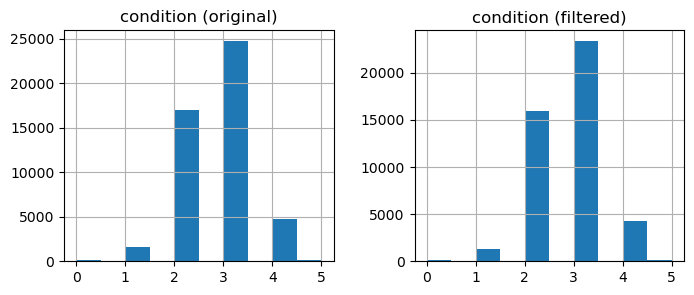

In [58]:
#for col in check_cols:
#    df.hist(column=[col], figsize=(4, 3))
#    filtered.hist(column=[col], figsize=(4, 3))
#    plt.show()
    
for col in check_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    df.hist(column=col, ax=axes[0])
    filtered.hist(column=col, ax=axes[1])
    axes[0].set_title(f"{col} (original)")
    axes[1].set_title(f"{col} (filtered)")
    plt.show()
    

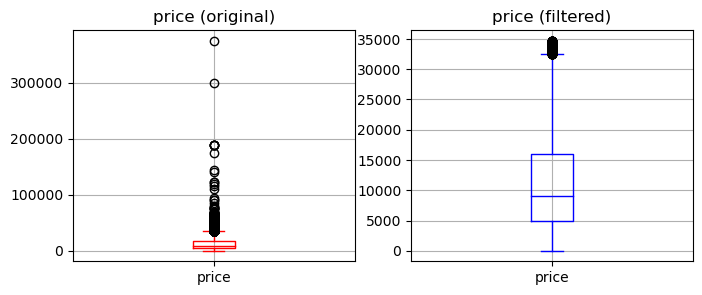

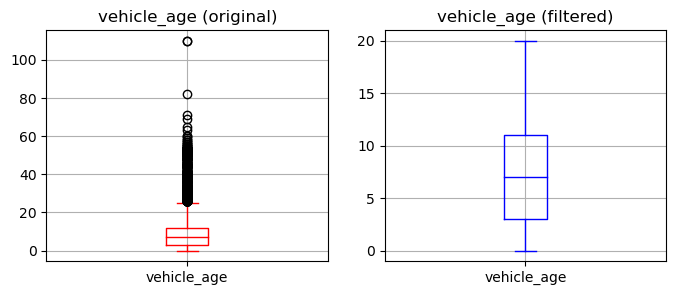

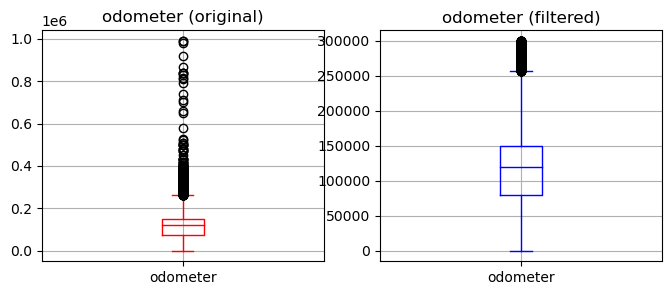

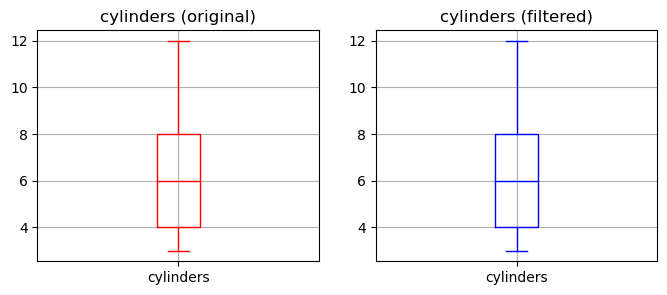

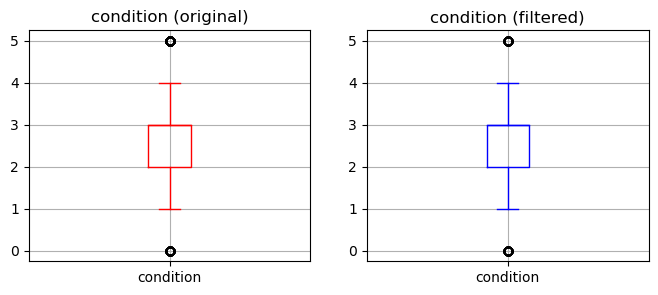

In [59]:
for col in check_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    df.boxplot(column=col, ax=axes[0], color='red')
    filtered.boxplot(column=col, ax=axes[1], color='blue')
    axes[0].set_title(f"{col} (original)")
    axes[1].set_title(f"{col} (filtered)")
    plt.show()
    

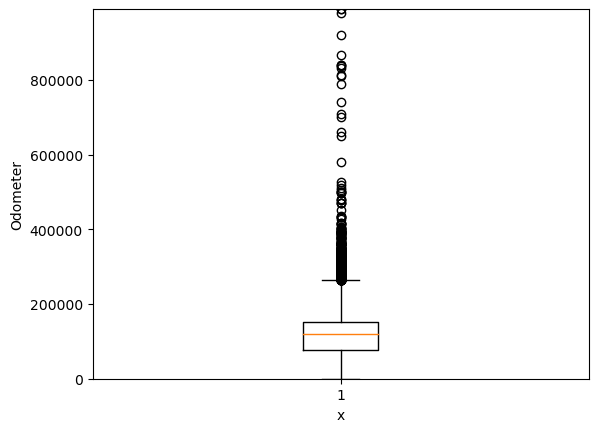

<Figure size 200x200 with 0 Axes>

In [60]:
limite_superior = df['odometer'].max()
limite_inferior = 0

plt.ylim(limite_inferior, limite_superior)

plt.xlabel('x')
plt.ylabel('Odometer')

plt.boxplot(df['odometer'])

plt.figure(figsize=(2, 2))
plt.show()

In [61]:
filtered['price'].describe()

count    44950.000000
mean     11346.923426
std       7846.216926
min          1.000000
25%       5000.000000
50%       9000.000000
75%      15995.000000
max      34700.000000
Name: price, dtype: float64

In [62]:
df['price'].describe()

count     48248.000000
mean      12229.253793
std       10100.238127
min           1.000000
25%        5000.000000
50%        9400.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

In [63]:
filtered['vehicle_age'].describe()

count    44950.000000
mean         7.435795
std          5.115234
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         20.000000
Name: vehicle_age, dtype: float64

### comparison conclusions:
- `price` has very few outliers but they are 10x bigger than the upper limit of the whiskers. the average value is 11,500

- `vehicle_age` typical values ​​are between 5 and 25 years.

- `odometer` has few cars over 300,000 km

- in `cylinders` and in `condition` there is no difference between the distribution of the original dataframe compared to the filtered dataframe

## start analysis with **filtered** table:

- correlation between number of advertisements and days listed
- correlation between num advertisements and price

- for the 2 types and more advertisements evaluate what is related to the price: using extremes and quartiles for categorical values ​​and dispersion for quantitative ones

- number of advertisements and average prices for vehicle types

### `days_listed`:

<AxesSubplot:>

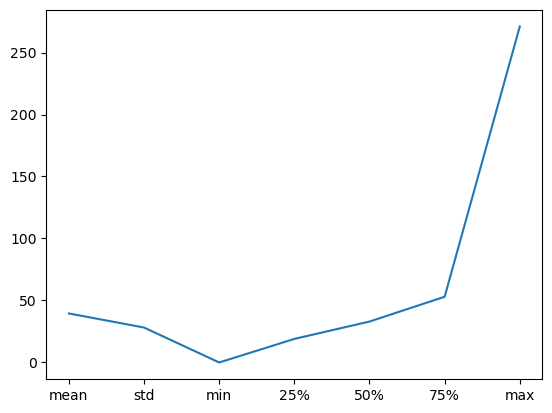

In [64]:
filtered['days_listed'].describe().drop('count', axis=0).plot()

In [65]:
filtered['days_listed'].describe().drop('count', axis=0)

mean     39.546340
std      28.175636
min       0.000000
25%      19.000000
50%      33.000000
75%      53.000000
max     271.000000
Name: days_listed, dtype: float64

### For each vehicle type:
- price average

In [66]:
auxtab = filtered.groupby('type').agg({'model': 'count', 'price': 'mean'}).reset_index().rename(columns={'model': 'count', 'price': 'avg price'}).sort_values(by='count', ascending=False)
auxtab # tabela ordenada pelo número de aparições do modelo (propagandas)

,type,count,avg price
9,sedan,11271,7051.314080
0,SUV,11173,10607.544079
10,truck,10267,15315.444044
8,pickup,5768,15319.921117
3,coupe,1798,13508.741379
12,wagon,1391,9082.552121
5,mini-van,1088,8176.691176
4,hatchback,971,6826.018538
11,van,525,8957.240000
2,convertible,314,13455.321656


- chart showing the dependence of the number of advertisements on the type of vehicle

<AxesSubplot:ylabel='type'>

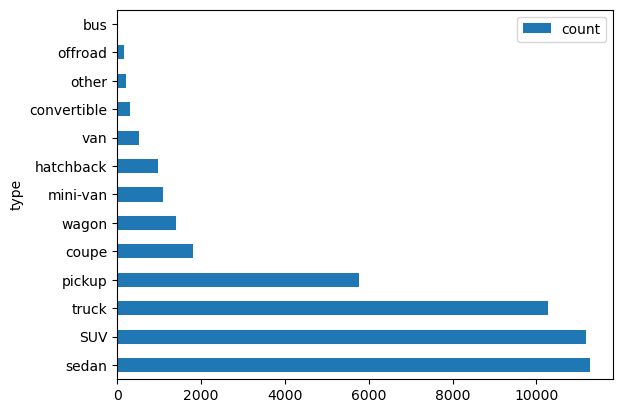

In [67]:
auxtab.plot.barh(y='count', x='type')

- I will select `truck`, `SUV` and `sedan` as they are the most relevant when compared to the rest

- number of advertisements + days listed:

In [68]:
auxtab2 = filtered.groupby('type').agg({'days_listed': 'mean', 'price': 'mean'}).reset_index().sort_values(by='days_listed', ascending=False)
auxtab2.head(3).reset_index(drop=True)

,type,days_listed,price
0,bus,46.450000,17563.300000
1,hatchback,40.782698,6826.018538
2,van,40.601905,8957.240000


<AxesSubplot:ylabel='type'>

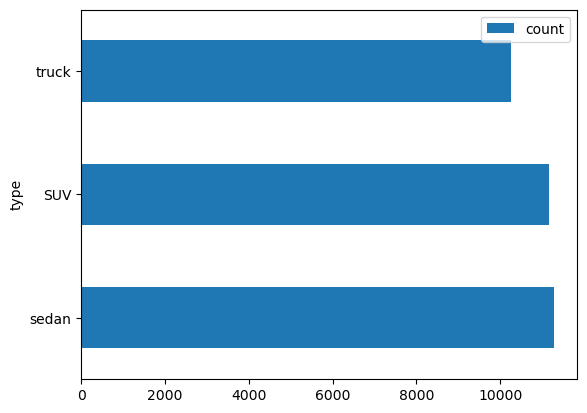

In [69]:
auxtab.head(3).plot.barh(y='count', x='type')

In [70]:
top_models = pd.DataFrame(filtered, columns=['type', 'price', 'days_listed']).reset_index(drop=True)
top_models = top_models.query('(type == "SUV") or (type == "truck") or (type == "sedan")')
top_models

,type,price,days_listed
0,SUV,9400,19
2,sedan,5500,79
4,sedan,14900,28
5,sedan,14990,15
6,sedan,12990,73
...,...,...,...
44944,sedan,3750,63
44946,sedan,9249,37
44947,sedan,2700,22
44948,sedan,3950,32


AxesSubplot(0.125,0.11;0.775x0.77)


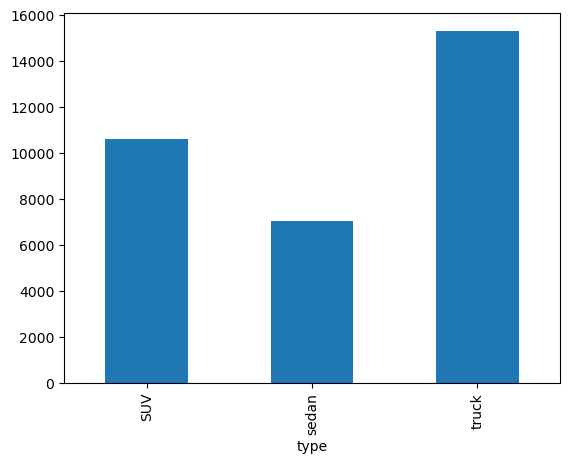

In [71]:
grouped_data = top_models.groupby('type')['price'].mean()
print(grouped_data.plot(kind='bar'))

## Price Factors

in general old cars are a little cheaper

### What factors impact the price of these 3 types the most?

### categorical: boxplot

- `transmissioin`
- `paint_color`

### quantitative: scatterplot

- `condition`
- `vehicle_age`
- `odometer`

AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


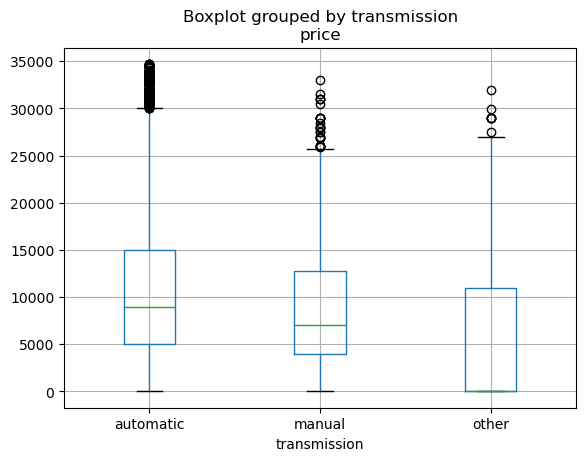

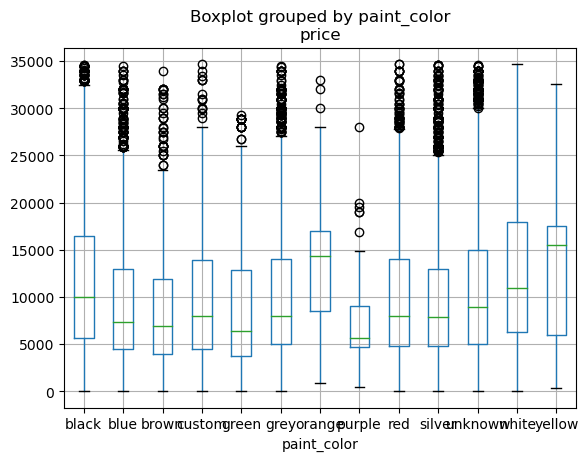

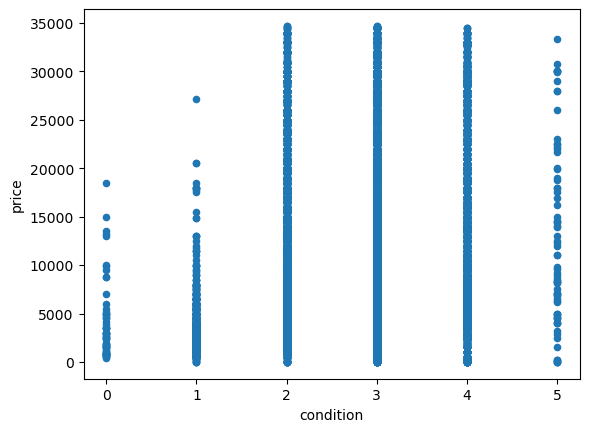

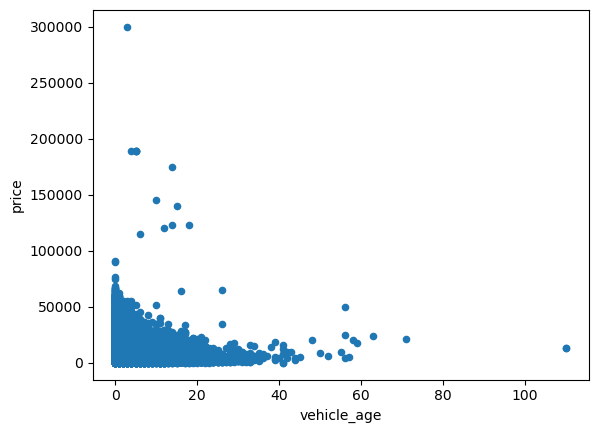

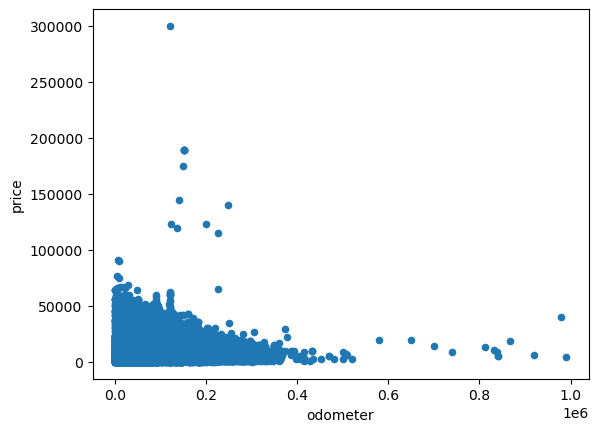

In [72]:
# boxplot
print(filtered[filtered['type'].isin(['SUV', 'sedan', 'truck'])].boxplot('price', by='transmission'))
print(filtered[filtered['type'].isin(['SUV', 'sedan', 'truck'])].boxplot('price', by='paint_color'))


#scatter
print(filtered[filtered['type'].isin(['SUV', 'sedan', 'truck'])].plot.scatter(x='condition', y='price'))
print(df[df['type'].isin(['SUV', 'sedan', 'truck'])].plot.scatter(x='vehicle_age', y='price'))
print(df[df['type'].isin(['SUV', 'sedan', 'truck'])].plot.scatter(x='odometer', y='price'))

In [73]:
for col in ['condition', 'vehicle_age', 'odometer']:
    print(filtered[col].corr(filtered['price']))

0.1843030960536484
-0.4626739260048691
-0.4221304611758554


In [74]:
print('percentage of new cars in site ads: ')

print(df[df['condition'] == 5]['condition'].count() * 100 / len(df), end=' ')
print('% on original dataframe ')

print(filtered[filtered['condition'] == 5]['condition'].count() * 100 / len(df), end=' ')
print('% on filtered dataframe')

percentage of new cars in site ads: 
0.29638534239761233 % on original dataframe 
0.19482672856905986 % on filtered dataframe


- automatic car it tends to be more expensive, as well as a newer one,

### general conclusion of the graphs above

- `transmission`: automatic cars are the most expensive among the 3 most advertised types.
<br><br>
- `paint_color`: white, yellow and black have a high pattern on the whiskers, even in the filtered dataframe. They are the most expensive colors, however I see no relationship between the color of the car and its price pattern.
<br><br>
- `condition`: the values ​​0/5 and 1/5 are notably cheaper than the others. There is also a certain scarcity of 5/5 cars, which is consistent with the percentage of 0.3% of new cars in the ads on the site.
<br><br>
- `vehicle_age` and `odometer`: both have -0.4 correlation with the price (`price`)
<br><br>

# final conclusion:

### related to the comparison between the complete dataframe (df) and the filtered one (filtered):

price has very few outliers but they are 10x larger than the upper limit of the whiskers. typical value is 11,500, vehicle_age typical values ​​are between 5 and 25 years, odometer has many values ​​above the default, but typical values ​​do not usually exceed 300,000km and in cylinders and condition there is no difference between the distribution of the original dataframe compared to the filtered dataframe.

- there is no correlation between the number of advertisements and the price for any of the 3 most sold types, since they have very similar advertisement numbers and average days listed, but very different average price values.

### related to parsing the filtered dataframe:

automatic cars tend to be more expensive, colors have very little influence but a higher average is observed in whites, blacks and yellows, scores 0 and 1 (total of 5) in terms of car condition have a much lower price when compared to scores 2 , 3 and 4 which are very close. There is also a certain scarcity of 5/5 cars (0.3% of advertised cars (in filtered, 0.2%)) which indicates that the cars on the site are predominantly used. The highest correlation with price is noted in mileage and vehicle age, both of which have a -0.4 correlation (ranges from -1 to 1) with price.